Introducción a Keras --- 0:00 min
===

* Última modificación: Marzo 1, 2022 | YouTube

* Adaptado de: Adaptado de: https://www.tensorflow.org/tutorials/quickstart/beginner

Importación de librerías
---

In [1]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf

Carga de datos
--

![assets/fashion-mnist-sprite.png](assets/fashion-mnist-sprite.png)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#
# Escalamiento del dataset
#
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape,

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Especificación del modelo
--

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(10),
    ]
)

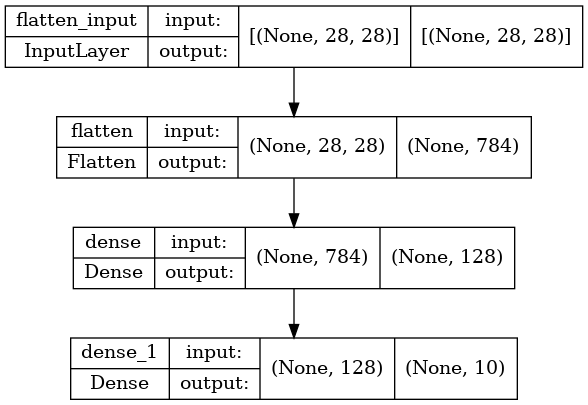

In [5]:
tf.keras.utils.plot_model(
    model,
    "model.png",
    show_shapes=True,
)

Pronóstico con el modelo sin entrenar
--

In [6]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-1.1033562e-01, -5.7309979e-01, -2.7639714e-01,  1.7261723e-01,
         7.2996676e-01,  3.2053888e-04,  1.0334440e+00,  1.7764536e-01,
        -7.6895314e-01, -1.5238631e-01]], dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.0758358 , 0.04774176, 0.06423248, 0.10063733, 0.17571667,
        0.08470941, 0.23801892, 0.10114463, 0.03925006, 0.07271297]],
      dtype=float32)

In [8]:
#
# La suma del vector de salida es ~ 1.0
#
sum(tf.nn.softmax(predictions).numpy()[0])

1.000000011175871

Función de pérdida
--

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True,
)

In [10]:
loss_fn(
    y_train[:1],
    predictions,
).numpy()

2.4685287

Compilación del modelo
--

In [11]:
model.compile(
    optimizer="adam",
    loss=loss_fn,
    metrics=["accuracy"],
)

Entrenamiento del modelo
---

In [12]:
model.fit(
    x_train,
    y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1127 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9765
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0577 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9859


Evaluación
---

In [13]:
model.evaluate(
    x_test,
    y_test,
    verbose=2,
)

313/313 - 2s - loss: 0.0720 - accuracy: 0.9775 - 2s/epoch - 5ms/step


[0.07202604413032532, 0.9775000214576721]

Generación de un nuevo modelo
--

In [14]:
probability_model = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Softmax(),
    ]
)

Uso del modelo
---

In [15]:
probability_model(
    x_test[:5],
)

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.7667977e-07, 3.5296035e-09, 2.9702183e-05, 1.2580733e-04,
        2.7208230e-11, 3.1016586e-07, 1.9121404e-12, 9.9982613e-01,
        4.8048958e-07, 1.7124168e-05],
       [4.2575788e-08, 3.0719129e-05, 9.9996471e-01, 1.1060716e-06,
        6.1545465e-15, 1.4549341e-08, 3.4343227e-06, 6.2676627e-13,
        5.9158676e-08, 3.3505481e-16],
       [2.7930748e-06, 9.9772972e-01, 1.6407080e-03, 2.1350806e-06,
        3.6052345e-05, 2.2417603e-07, 7.8552053e-05, 2.7539532e-04,
        2.3259959e-04, 1.7847162e-06],
       [9.9980444e-01, 8.1731592e-08, 1.7427785e-04, 7.6105499e-07,
        3.0205629e-07, 3.0637614e-07, 1.7587145e-05, 2.0335081e-06,
        5.9337304e-09, 1.0556296e-07],
       [5.8167534e-06, 1.2832059e-07, 4.4159160e-06, 1.9953372e-08,
        9.5074970e-01, 4.3736662e-07, 3.3536562e-05, 5.9447502e-05,
        1.5542504e-06, 4.9144998e-02]], dtype=float32)>